In [1]:
import matplotlib.pylab as plt 
%matplotlib inline
import numpy as np
import rubin_sim.maf_proto as maf
import pandas as pd
import sqlite3
import healpy as hp
import copy

from os.path import basename

In [2]:
db_file = "baseline_v5.0.0_10yrs.db"
run_name = basename(db_file).replace('.db', '')
con = sqlite3.connect(db_file)
df = pd.read_sql('select * from observations;', con)
con.close()
# Convert to a numpy array
visits_array = df.to_records(index=False)

In [3]:
good = np.where(visits_array["night"] == 1)[0]

In [8]:
extra = ['pair_33, gr' in note for note in visits_array["scheduler_note"][good]]

sub_data = visits_array[good[extra]][0:104]

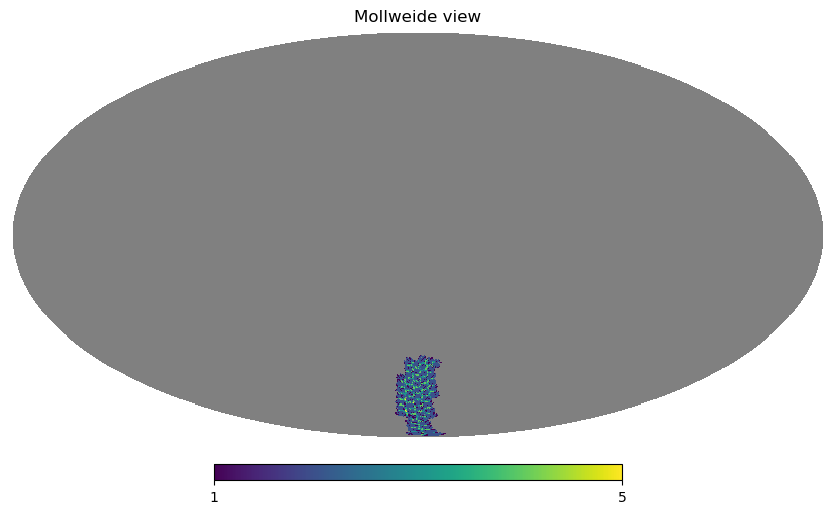

In [9]:
sl = maf.Slicer()
metric = maf.CountMetric()
hp_array = sl(sub_data, metric)
hp.mollview(hp_array)

In [13]:
nside = hp.npix2nside(hp_array.size)
np.isfinite(hp_array).sum() * hp.nside2pixarea(nside, degrees=True)

np.float64(437.4818125663207)

In [14]:
sub_data.size

104